# Calculating the body mass of dinosaurs

In this Jupyter Notebook you will write a function that takes a femur length and dinosaur type and returns the predicted body mass of the dinosaur. Then you will write a function that finds the average body mass for a given type of dinosaur.

### Work with your partner on this Notebook

Import numpy and pandas. We won't need pandas for the first part of the activity, but we'll need it later.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Here are the equations for converting femur length (FL) to body mass (in kg) for each dinosaur type:

In [3]:
#ornithischian: 10**(3.0587*np.log10(FL)-2.7042)/1000

#sauropod: 10**(2.3459*np.log10(FL)-0.2935)/1000

#theropod: 10**(3.1854*np.log10(FL)-3.184)/1000

Using these formulas, create a function that takes *two arguments:* the **dinosaur type** and the **femur length in mm** and *returns* the **dinosaur's body mass**

In [4]:
def bodyMass(dtype, fl):
    if dtype == "ornithischian":
        bm = 10**(3.0587*np.log10(fl)-2.7042)/1000
    elif dtype == "sauropod":
        bm = 10**(2.3459*np.log10(fl)-0.2935)/1000
    elif dtype == "theropod":
        bm = 10**(3.1854*np.log10(fl)-3.184)/1000
    return bm

Now, call your function with the information for your dinosaur and print the result:

In [5]:
print(bodyMass("ornithischian", 1150))

4545.23648658


For reference, here is the average body mass in kg of a few animals:
- golden retreivers: 27 kg
- humans: 62 kg
- elephants: 4500 kg
- blue whales: 110,000 kg

## Part 2: Working with a larger dataset
In the next part of the notebook, you will work with a data set that contains the femur lengths for a number of dinosaurs of each type. 

Create a variable and read in the CSV file to create a dataframe:

In [6]:
df = pd.read_csv("Dinosaur_FemurLength.csv")

Find the header for this data frame:

In [7]:
df.head()

,Clade,Genus,Species,Femur length (mm)
0,Ornithischia,Anatosaurus*,copei*,1150.0
1,Ornithischia,Bactrosaurus,johnsoni,790.5
2,Ornithischia,Corythosaurus,casuarius,1080.0
3,Ornithischia,Edmontosaurus,annectens,1068.5
4,Ornithischia,Edmontosaurus,regalis,1245.0


Find the number of rows in this data frame:

In [8]:
len(df)

77

Next, create a function that takes *one argument:* the **dinosaur type** and *returns* the **average body mass** for that dinosaur type.

(Note: You do not need to specify the data frame as an argument, because we are only working with a single data frame)

Hints: 
- You will need to use the .loc[] index command that we learned for the Astrophysics unit project.
- The three dinosaur types (Clades) in this data set are: Ornithischia, Sauropodomorpha, and Theropoda

In [9]:
def AvgBodyMass(dtype):
    df_clade = df.loc[df["Clade"] == dtype].copy()
    if dtype == "Ornithischia":
        df_clade["body mass"] = 10**(3.0587*np.log10(df_clade["Femur length (mm)"])-2.7042)/1000
    elif dtype == "Sauropodomorpha":
        df_clade["body mass"] = 10**(2.3459*np.log10(df_clade["Femur length (mm)"])-0.2935)/1000
    elif dtype == "Theropoda":
        df_clade["body mass"] = 10**(3.1854*np.log10(df_clade["Femur length (mm)"])-3.184)/1000
    avg_bmass = df_clade["body mass"].mean()
    return avg_bmass      

Test out your function! Call it for each dinosaur type and print the result:

In [19]:
ornithischia_avg = AvgBodyMass("Ornithischia")
print(AvgBodyMass("Ornithischia"))

2027.021216226341


In [20]:
sauropod_avg = AvgBodyMass("Sauropodomorpha")
print(AvgBodyMass("Sauropodomorpha"))

14085.95227228473


In [21]:
theropod_avg = AvgBodyMass("Theropoda")
print(AvgBodyMass("Theropoda"))

1235.0575686959592


## Bonus Challenge

Make a bar graph that compares the average body mass for each dinosaur type:

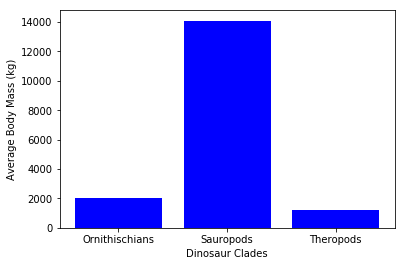

In [25]:
plt.bar([1,2,3], [ornithischia_avg, sauropod_avg, theropod_avg], color = "blue")
plt.xticks([1,2,3], ["Ornithischians","Sauropods","Theropods"])
plt.xlabel("Dinosaur Clades")
plt.ylabel("Average Body Mass (kg)")
plt.show()